# Базы данных





# начнем в 40 минут

### Где хранить данные?<br>
   <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
    - В памяти
    - На диске
    - На диске и в памяти
    - 


### Термины
- БД - Взаимосвязанные данные специальным образом хранящиеся на каком-либо носителе<br>
- СУБД – Программный комплекс обеспечивающий работу с данными в БД
- Первиичный ключ (primary key) — в реляционной модели данных один из потенциальных ключей отношения, выбранный в качестве основного ключа (или ключа по умолчанию). Если в отношении имеется единственный потенциальный ключ, он является и первичным ключом. Если потенциальных ключей несколько, один из них выбирается в качестве первичного, а другие называют «альтернативными».
- Внешний ключ — это столбец или комбинация столбцов, значения которых соответствуют Первичному ключу в другой таблице. Связь между двумя таблицами задается через соответствие первичного ключа в одной из таблиц внешнему ключу во второй.

### Для чего нужно СУБД?

- Управление данными на дисках и в оперативной памяти 
- Журнализация, резервное копирование
- Предоставление интерфейсов взаимодействия с БД
- Предоставление механизма транзакций


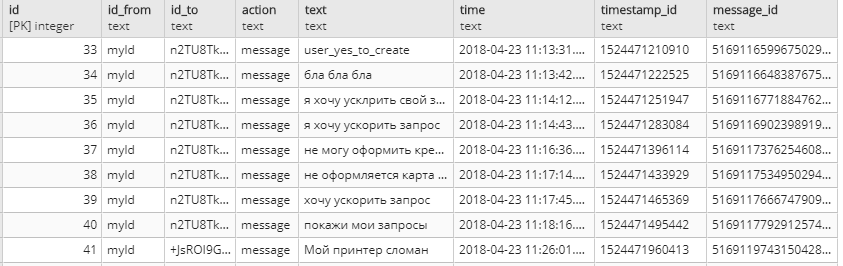

# SQL

In [ ]:
SELECT * FROM users WHERE age > 10;
SELECT * FROM users WHERE name = 'masha';
SELECT MAX(age) FROM users;

SELECT id, name, LENGTH(name) AS len
FROM users
WHERE email LIKE '%@mail.ru' AND age > 10
ORDER BY name DESC
LIMIT 10 OFFSET 15;


Дока по встроенным методам в MySQL
https://dev.mysql.com/doc/refman/8.0/en/string-functions.html


In [ ]:
SELECT first_name, count(id) as cnt 
FROM users_user 
WHERE first_name 
LIKE "%дим%" 
GROUP BY first_name 
HAVING cnt > 100
ORDER BY cnt;


In [ ]:
INSERT INTO users (name, age) VALUES ('Petr', 10);

UPDATE users SET rating = rating + 1;
UPDATE users SET age = 20 WHERE name = 'Petr';

DELETE FROM users WHERE name = 'Masha';
DELETE FROM users WHERE age > 150;


# PostgreSQL

In [ ]:
import psycopg2

connection_data = {
    "dbname": "Calendar",
    "user": "api_user",
    "host": "localhost",
    "password": "1"
}

def connect(connection_data):
    conn_string = "dbname='{}' user='{}' host='{}' password='{}'".format(connection_data["dbname"], connection_data["user"], connection_data["host"], connection_data["password"])
    conn = psycopg2.connect(conn_string)
    conn.autocommit = True
    return conn

def disconnect(conn):
    conn.close()
    
def getData(db_id):
    cur = conn.cursor()
    cur.execute("SELECT User FROM public.\"Events\" WHERE id = %s", (str(db_id),))
    rows = cur.fetchall()
    cur.close()

    if len(rows) > 0:
        return rows
    else:
        return False
def insertData(text, number):
    cur = conn.cursor()
    cur.execute("INSERT INTO public.\"test_table\" (text, number, date) VALUES (%s, %s, now())", (str(text), str(number)))
    cur.execute("INSERT INTO public.\"test_table\" (text, number, date) VALUES (%s, %s, now())", (str(text), str(number)))
    cur.execute("INSERT INTO public.\"test_table\" (text, number, date) VALUES (%s, %s, now())", (str(text), str(number)))
    
    #conn.commit()
    cur.close()
    return True

def insertData(text, id_num):
    cur = conn.cursor()
    cur.execute("UPDATE public.\"test_table\" SET text=%s WHERE id=%s", (str(text),str(id_num)))
    #conn.commit()
    cur.close()
    return True



# Oracle

In [ ]:
import cx_Oracle
def connect(connection_data):
    conn = cx_Oracle.connect(connection_data["user"], connection_data["password"], connection_data["dbname"])
    return conn

def disconnect(conn):
    conn.close()
    
def getData(db_id):
    cur = conn.cursor()
    cur.execute("SELECT UUID, User FROM Events WHERE id = :id", {"id": db_id})
    rows = cur.fetchall()
    cur.close()

    if len(rows) > 0:
        return rows
    else:
        return False

# MSSQL

In [ ]:
import pyodbc
def connect(connection_data):
    conn_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER='+connection_data["host"]+';DATABASE='+connection_data["dbname"]+';UID='+connection_data["user"]+';PWD='+ connection_data["password"]
    conn = conn = pyodbc.connect(conn_string)
    return conn

def disconnect(conn):
    conn.close()
    
def getData(db_id):
    cur = conn.cursor()
    cur.execute("SELECT UUID, User FROM Events WHERE id = 1)
    rows = cur.fetchall()
    cur.close()

    if len(rows) > 0:
        return rows
    else:
        return False

# SQLLite



In [ ]:
import sqlite3
def connect(connection_data):
    conn = sqlite3.connect("mydatabase.db") # или :memory: чтобы сохранить в RAM
    return conn

def create_table():
    cursor = conn.cursor()
    # Создание таблицы
    cursor.execute("""CREATE TABLE albums
                      (title text, artist text, release_date text,
                       publisher text, media_type text)
                   """)
    return True

def insert():
    cursor = conn.cursor()
    # Вставляем данные в таблицу
    cursor.execute("INSERT INTO albums VALUES ('Glow', 'Andy Hunter', '7/24/2012', 'Xplore Records', 'MP3')")
 
    # Сохраняем изменения
    conn.commit()
    return True
 
def manyInsert():
    cursor = conn.cursor()
    # Вставляем множество данных в таблицу используя безопасный метод "?"
    albums = [('Exodus', 'Andy Hunter', '7/9/2002', 'Sparrow Records', 'CD'),
              ('Until We Have Faces', 'Red', '2/1/2011', 'Essential Records', 'CD'),
              ('The End is Where We Begin', 'Thousand Foot Krutch', '4/17/2012', 'TFKmusic', 'CD'),
              ('The Good Life', 'Trip Lee', '4/10/2012', 'Reach Records', 'CD')]

    cursor.executemany("INSERT INTO albums VALUES (?,?,?,?,?)", albums)
    conn.commit()
    return True

def update():
    cursor = conn.cursor()
    
     sql = """
    UPDATE albums 
    SET artist = 'John Doe' 
    WHERE artist = 'Andy Hunter'
    """
    cursor.execute(sql)
    conn.commit()
    return True

def delet():
    cursor = conn.cursor()
 
    sql = "DELETE FROM albums WHERE artist = 'John Doe'"

    cursor.execute(sql)
    conn.commit()
    return True
def select():
    cursor = conn.cursor()
    sql = "SELECT * FROM albums WHERE title LIKE 'The%'"
    cursor.execute(sql)

    rows = cursor.fetchall()
    print(rows)
    return rows

# MySQL

In [ ]:
import pymysql.cursors
import sys
login = "tp_user"
password = "tp_password"
db_name = "sys_base"

connection = pymysql.connect(host='localhost', user=login, password=password, db=db_name, charset='utf8mb4', cursorclass=pymysql.cursors.DictCursor)


sql = 'SELECT first_name, last_name from users_user limit 5;'
cursor = connection.cursor()
cursor.execute(sql)
result = cursor.fetchall()
for user in result:
    print('{} {}'.format(user['first_name'], user['last_name']))